### **L4 기반(Google pro)**
- **불용어후보(7.2, 월)바탕으로 LDA**

### **한글깨짐 방지 아래 코드 돌리고 재시작**

In [90]:
%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

### **세션 다시 시작(재시작)**

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import time
import gzip
import pickle
import os

### **파일 읽기**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **전체 파일 불러오기**

In [34]:
#df.to_pickle('/content/drive/MyDrive/이대과제/data/df_gzip.pkl', compression='gzip')
# /content/drive/MyDrive/이대과제/data/df_sample_gzip.pkl
df= pd.read_pickle('/content/drive/MyDrive/이대과제/data/df_gzip.pkl', compression='gzip')
# 필요한 컬럼만 추출
df= df[['일자', '특성추출(가중치순 상위 50개)', '년도']]
print(df.shape)
df.head()

(5641608, 3)


,일자,특성추출(가중치순 상위 50개),년도
0,2010-01-01,"네트워크,3조,네이버,sk텔레콤,일본,사용자,kt,장악력,생산성,융합사업,이종산업,...",2010
1,2010-01-01,"일본,싱가포르,슈퍼컴퓨터,전자폐기물,스마트그리드,대만,전력망,신재생,연구소,각국,차...",2010
2,2010-01-01,"백화점,편의점,온라인,대형마트,경쟁력,유통산업발전법,복합몰,유통업,신세계,쇼핑몰,신장세",2010
3,2010-01-01,"장애인,진료비,의료기관,진단서,이데일리,소비자,건강보험,영유아,치료제,보건소,만4세...",2010
4,2010-01-01,"이데일리,상반기,일자리,선제적,공직자들,공직자,민간기업,해외진출,출구전략,재정지출,...",2010


In [35]:
# df= df.sample(frac=0.01, random_state=74)
# df

In [36]:
df['년도'].value_counts()

년도
2023    626545
2020    571102
2021    562516
2022    539576
2019    459941
2018    389738
2017    352585
2015    342705
2016    327177
2014    313273
2013    267576
2024    242256
2012    236247
2011    215541
2010    194830
Name: count, dtype: int64

<Figure size 1500x500 with 0 Axes>

Text(2010.0, 194830, '194830')

Text(2011.0, 215541, '215541')

Text(2012.0, 236247, '236247')

Text(2013.0, 267576, '267576')

Text(2014.0, 313273, '313273')

Text(2015.0, 342705, '342705')

Text(2016.0, 327177, '327177')

Text(2017.0, 352585, '352585')

Text(2018.0, 389738, '389738')

Text(2019.0, 459941, '459941')

Text(2020.0, 571102, '571102')

Text(2021.0, 562516, '562516')

Text(2022.0, 539576, '539576')

Text(2023.0, 626545, '626545')

Text(2024.0, 242256, '242256')

(array([2008., 2010., 2012., 2014., 2016., 2018., 2020., 2022., 2024.,
        2026.]),
 [Text(2008.0, 0, '2008'),
  Text(2010.0, 0, '2010'),
  Text(2012.0, 0, '2012'),
  Text(2014.0, 0, '2014'),
  Text(2016.0, 0, '2016'),
  Text(2018.0, 0, '2018'),
  Text(2020.0, 0, '2020'),
  Text(2022.0, 0, '2022'),
  Text(2024.0, 0, '2024'),
  Text(2026.0, 0, '2026')])

Text(0.5, 1.0, '년도별 온라인 기사 건수')

Text(0.5, 0, '년도')

Text(0, 0.5, '온라인 건수')

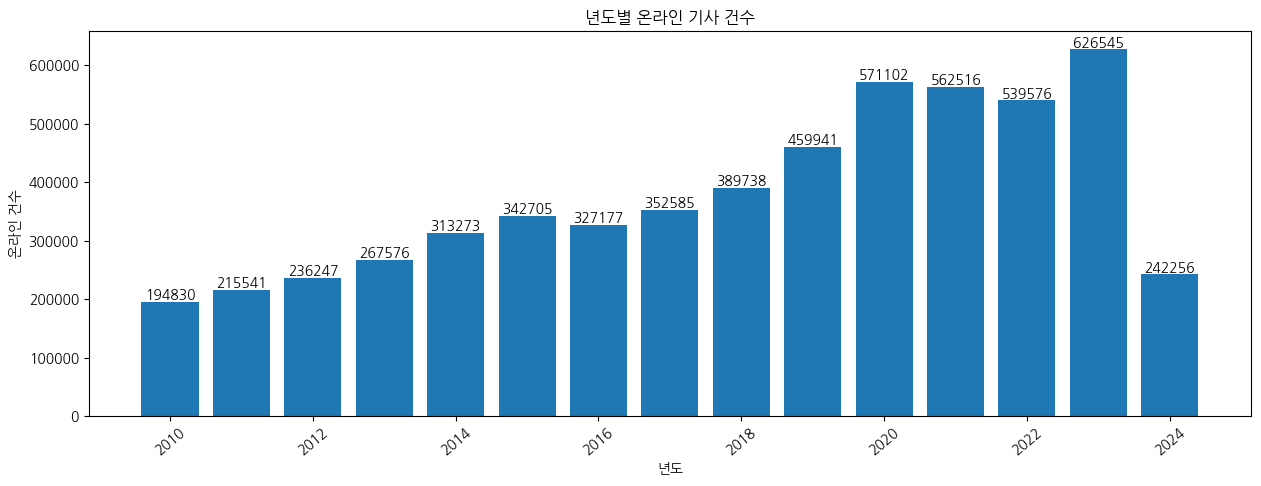

In [48]:
# 년도별 건수 계산
yearly_counts = df['년도'].value_counts().sort_index()

# 막대그래프 생성
plt.figure(figsize=(15, 5))
bars = plt.bar(yearly_counts.index, yearly_counts.values)

# 막대 위에 실제 값 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center', fontsize=10)

# 그래프 설정
plt.xticks(rotation=40)
plt.title('년도별 온라인 기사 건수')
plt.xlabel('년도')
plt.ylabel('온라인 건수')

plt.savefig('/content/drive/MyDrive/이대과제/0705/년도별 온라인 기사 건수.png')

In [51]:
pd.DataFrame(df['년도'].value_counts()).T.to_excel('/content/drive/MyDrive/이대과제/0705/년도별 온라인 기사 건수.xlsx')

In [ ]:
# prompt: 이 그림 저장하기

import matplotlib.pyplot as plt


## **Sampling**

In [ ]:
# df= df.sample(frac=0.4, random_state=74)

### **불용어**

In [ ]:
# ! pip install openpyxl
data = pd.read_excel('/content/drive/MyDrive/이대과제/data/불용어후보.xlsx')
print(data.shape)
data.tail()

# 불용어 처리
stop_words = data[data['불용어_0704'] == 1]['단어'].tolist()

(4889, 10)


,단어,불룡어?,유형,이대,불용어_0622,불용어_0625,불용어_0627,불용어_0702,불용어_0703,불용어_0704
4884,국민은행,NaN,추가작업_0704,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4885,간호사,NaN,추가작업_0704,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4886,가능성,NaN,추가작업_0704,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4887,금융,NaN,추가작업_0704,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4888,광화문,NaN,추가작업_0704,NaN,NaN,NaN,NaN,NaN,NaN,1.0


## **<font color='blue'> gensim을 이용하여 LDA**

- 하이퍼파라미터 3개 부터 10개 LDA수행 후 토픽 개수 결정
- topic : 당신이 가설로 잡은 토픽의 갯수는?
- chunksize : 얼마나 많은 문서가 훈련 알고리즘에 사용되는가?
- 만약에 빠른 학습이 중요하시다면, 청크사이즈를 키워서 돌려봅시다!
- Hoffman의 논문에 의하면 Chunksize는 모델 품질에 영향을 미치지만 차이그 그렇게 크진 않다고 합니다!
- passes : 패스는 모델 학습시 전체 코퍼스에서 모델을 학습시키는 빈도를 제어한다고 합니다. epochs 와 같은 용어 같다! model를 학습시키는 횟수를 말하는것 같아요! model sampling?
- iteration : 각각 문서에 대해서 루프를 얼마나 돌리는지를 제어한다고 합니다.
pass & iteration 은 최대한 많은게 좋다!
- eval_every = 1 in LdaModel
- alpha, eta = auto, 디리클레 분포의 감마함수에 대한 파라미터입니다!

In [ ]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint
# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
#from gensim.utils import lemmatize, simple_preprocess # lemmatize is no longer in gensim.utils
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from nltk.tokenize import RegexpTokenizer

### **1. 정규표현식으로 필요한 단어만 추출하거나, 불필요한 단어를 삭제**

In [ ]:
RegTok = RegexpTokenizer("[\w']{2,}") # 정규포현식으로 토크나이저를 정의
food_stops = set(stop_words) # 불용어를 가져옴

# Compile the additional regular expressions
pattern_mixed = re.compile(r'(?=.*\d)(?=.*[a-zA-Z가-힣])') # 숫자와 알파벳 또는 한글이 모두 포함된 문자열을 찾는 정규 표현식
pattern_korean_english = re.compile(r'^[가-힣a-zA-Z]+$')  # 한글과 알파벳으로만 구성된 문자열을 찾는 정규 표현식

# Define the pattern to remove words containing both numbers and either English or Korean characters
pattern_remove = re.compile(r'\d+[a-zA-Z가-힣]+|[a-zA-Z가-힣]+\d+')  # 90ml', '1항', '3qo', '30개국' 등과 같이 수자와 영문, 수자와 한글이 나오는 단어를 제거

def tokenizer(text):
    tokens = RegTok.tokenize(text)
    # Filter out stop words and apply the additional patterns
    words = [word for word in tokens if (word not in food_stops) and
             (len(word) >= 2) and
             not pattern_remove.match(word) and
             (pattern_mixed.match(word) or pattern_korean_english.match(word))]
    return words

In [ ]:
# Check the data types in your DataFrame
print(df['특성추출(가중치순 상위 50개)'].dtypes)

# If the column is not of type string, convert it:
df['특성추출(가중치순 상위 50개)'] = df['특성추출(가중치순 상위 50개)'].astype(str)

texts = [tokenizer(news) for news in df['특성추출(가중치순 상위 50개)']]

object


### **2. 종합계획별(3개 년도별) 데이터 분리하여 종합계획별 워드클라우드 시각화 저정 생성하기**

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 데이터프레임 생성
df['특성추출(가중치순 상위 50개)'] = texts
df['특성추출(가중치순 상위 50개)'] = df['특성추출(가중치순 상위 50개)'].apply(lambda x: ' '.join(map(str, x)))
df.head()

# 데이터프레임을 3개년도씩 분리
year_ranges = [(2010, 2012), (2013, 2015), (2016, 2018), (2019, 2021), (2022, 2024)]
data_splits = []

for start_year, end_year in year_ranges:
    split_data = df[(df['년도'] >= start_year) & (df['년도'] <= end_year)]
    data_splits.append((f'{start_year}-{end_year}', split_data))

# 워드클라우드 생성 함수
def generate_wordcloud(text):
    return WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf', width=800, height=400, background_color='white').generate(text)

# 3x2 그리드 설정
fig, axes = plt.subplots(3, 2, figsize=(25, 20))
axes = axes.flatten()

# 각 기간별 워드클라우드 생성 및 시각화
for ax, (title, split_data) in zip(axes, data_splits):
    text = ' '.join(split_data['특성추출(가중치순 상위 50개)'])
    wordcloud = generate_wordcloud(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'Word Cloud from {title}')
    ax.axis('off')

# 남는 서브플롯 숨기기
for i in range(len(data_splits), len(axes)):
    fig.delaxes(axes[i])

# 전체 제목 설정
plt.suptitle('Word Clouds for Different Year Ranges', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# 디렉토리 생성
output_dir = '/content/drive/MyDrive/이대과제/wordclouds'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 그림 파일로 저장
output_path = os.path.join(output_dir, 'word_clouds.png')
plt.savefig(output_path)

# 그림 표시
plt.show()

print(f"The word cloud image has been saved as '{output_path}' in your Google Drive.")

Output hidden; open in https://colab.research.google.com to view.

### **3. word2vec 구하고 파일저장, 다운로드하기**

In [ ]:
from gensim.models import Word2Vec
import pandas as pd
from tqdm import tqdm
import time
import os

start = time.time()  # 시작 시간 저장

# 데이터프레임을 3개년도씩 분리
year_ranges = [(2010, 2012), (2013, 2015), (2016, 2018), (2019, 2021), (2022, 2024)]

# 디렉토리 생성
output_dir = '/content/drive/MyDrive/이대과제/image'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 임시 tokenizer 함수 (실제 tokenizer 함수를 정의하세요)
def tokenizer(text):
    return text.split()

for start_year, end_year in year_ranges:
    split_data = df[(df['년도'] >= start_year) & (df['년도'] <= end_year)]
    texts = [tokenizer(news) for news in split_data['특성추출(가중치순 상위 50개)']]

    # 텍스트 데이터 확인
    print(f"{start_year}-{end_year} 텍스트 데이터 샘플: ", texts[:2])

    # Word2Vec 모델 초기화
    embedding_model = Word2Vec(vector_size=50,
                               window=2,
                               min_count=20,  # 어휘 구축을 위한 최소 빈도
                               workers=4,
                               sg=1)

    # 어휘 구축
    embedding_model.build_vocab(texts, progress_per=1000)
    print(f"{start_year}-{end_year} 어휘 구축 완료, 단어 수: ", len(embedding_model.wv))

    # 모델 훈련
    embedding_model.train(texts, total_examples=embedding_model.corpus_count, epochs=30)
    print(f"{start_year}-{end_year} 모델 훈련 완료")

    # Save vectors and metadata
    words = embedding_model.wv.index_to_key
    vectors = embedding_model.wv.vectors
    print(len(words), len(vectors))

    print(f"{start_year}부터 {end_year}의 훈련과정(fitting)과 metadata and vectors dataframe have been created.")

    # 구글드라이브에 저장하기
    # Save metadata.tsv
    words_df = pd.DataFrame(words, columns=['word'])
    words_df.to_csv(f'{output_dir}/{start_year}_{end_year}_words.tsv', sep='\t', index=False, header=False)

    # Save vectors.tsv
    vectors_df = pd.DataFrame(vectors)
    vectors_df.to_csv(f'{output_dir}/{start_year}_{end_year}_vectors.tsv', sep='\t', index=False, header=False)

    print(f"{start_year}부터 {end_year}년의 metadata(words) and vectors 파일은 have been created.")

print("전체수행시간은 time(minitues):", (time.time() - start)/60)  # 현재시각 - 시작시간 = 실행 시간



2010-2012 텍스트 데이터 샘플:  [['장악력', '생산성', '융합사업', '이종산업'], ['슈퍼컴퓨터', '전자폐기물', '스마트그리드', '전력망', '방글라데시', '계산능력', '하토야마', '태양광발전소']]
2010-2012 어휘 구축 완료, 단어 수:  64838


(251341415, 323671020)

2010-2012 모델 훈련 완료
64838 64838
2010부터 2012의 훈련과정(fitting)과 metadata and vectors dataframe have been created.
2010부터 2012년의 metadata(words) and vectors 파일은 have been created.
2013-2015 텍스트 데이터 샘플:  [['신도시', '지자체', '행정타운', '유치원', '유비쿼터스', '편집부', '광고물', '공동주택'], ['홈플러스', '알뜰폰', '손경식', '식음료', '이재기', '신년사', '홈플러스그룹', '이승한', '경영방침', '수익력', '중산층', '투자비', '저소득층', '기분전환', '편의성', '전문화', '최저수익']]
2013-2015 어휘 구축 완료, 단어 수:  80886


(345807844, 430462200)

2013-2015 모델 훈련 완료
80886 80886
2013부터 2015의 훈련과정(fitting)과 metadata and vectors dataframe have been created.
2013부터 2015년의 metadata(words) and vectors 파일은 have been created.
2016-2018 텍스트 데이터 샘플:  [['대한항공', '왕옌니', '인천국제공항', '한국관광공사', '지창훈', '김종덕', '한국방문위원회', '문화체육관광부', '첫날', '정창수', '신정'], ['부양책', '하현종', '소비세', '그랜드', '이승희', '유경하', '최고치', '배상근연구원', '성장률', '증가추세', '부원장', '현대경제연구원', '이준협', '노후불안', '저유가', '처방책', '영상편집', '정책역량', '영상취재']]
2016-2018 어휘 구축 완료, 단어 수:  88410


(390090444, 480495420)

2016-2018 모델 훈련 완료
88410 88410
2016부터 2018의 훈련과정(fitting)과 metadata and vectors dataframe have been created.
2016부터 2018년의 metadata(words) and vectors 파일은 have been created.
2019-2021 텍스트 데이터 샘플:  [['이영애', '제일병원', '노동조합', '경영진', '법정관리', '회생절차', '이기원', '이재곤', '다문화가정', '다문화', '정승권'], ['통영', '관광산업', '고군산군도', '관광지', '부유식']]
2019-2021 어휘 구축 완료, 단어 수:  110579


(559201175, 666219630)

2019-2021 모델 훈련 완료
110579 110579
2019부터 2021의 훈련과정(fitting)과 metadata and vectors dataframe have been created.
2019부터 2021년의 metadata(words) and vectors 파일은 have been created.
2022-2024 텍스트 데이터 샘플:  [['온라인', '우리나라', '탄소중립', '혁신밸리', '농산물', '식량안보', '공익직불제', '가축질병'], ['노원', '일상회복', '권역별', '강동형', '구민들', '중심지', '강동', '보건지소', '수락산']]
2022-2024 어휘 구축 완료, 단어 수:  97131


(470369572, 562504380)

2022-2024 모델 훈련 완료
97131 97131
2022부터 2024의 훈련과정(fitting)과 metadata and vectors dataframe have been created.
2022부터 2024년의 metadata(words) and vectors 파일은 have been created.
전체수행시간은 time(minitues): 63.23157205581665


In [ ]:
vectors_df.to_csv

[' ']

In [ ]:
from gensim.models import Word2Vec
import pandas as pd
from tqdm import tqdm
import time

start = time.time()  # 시작 시간 저장

# Train Word2Vec model with specified parameters
embedding_model = Word2Vec(texts, # Use the full 'texts' list
                           vector_size=50,
                           window=2,
                           min_count=20,
                           workers=4,
                           epochs= 30,
                           sg=1)

print("Training completed.")

# Save vectors and metadata
words = embedding_model.wv.index_to_key
vectors = [embedding_model.wv[word] for word in words]

print("metadata and vectors dataframe have been created.")
print("time(minitues):", (time.time() - start)/60)  # 현재시각 - 시작시간 = 실행 시간

Training completed.
metadata and vectors dataframe have been created.
time(minitues): 0.24662506580352783


In [ ]:
words[:10]

['온라인', '전문가', '소비자', '캠페인', '편의점', '빅데이터', '지자체', '학생들', '우리나라', 'ai']

In [ ]:
vectors[:3]

[array([-8.7618165e-02,  3.2617790e-01,  5.2858102e-01,  6.5435342e-02,
        -3.7199862e-02, -3.1387338e-01,  3.7966955e-01,  4.7335616e-01,
        -7.1043289e-01, -1.2894449e-01,  1.8331756e-01,  1.9105786e-04,
        -3.3363655e-01,  3.8467118e-01, -2.9730652e-02,  1.2840484e-01,
         3.5446033e-01,  2.7336207e-01, -3.1715301e-01, -8.1696439e-01,
         1.4450981e-01,  2.4255243e-01,  3.6189380e-01, -1.6121362e-01,
         3.1561929e-01, -1.7388862e-01, -2.9670414e-01,  1.4568523e-01,
        -2.3746148e-01, -1.7850393e-01,  1.1971364e-01,  7.9347536e-02,
         1.0473070e-01, -5.0491786e-01, -1.3631237e-01, -1.3163863e-01,
         5.0751638e-01, -2.7573177e-01, -7.8702038e-03, -2.7181321e-01,
        -5.1445025e-01,  1.3062033e-01,  3.2000914e-02,  1.3986768e-01,
         2.2919919e-01,  2.9030159e-02, -2.2337587e-01, -4.3965261e-02,
         1.9485322e-01,  5.7632154e-01], dtype=float32),
 array([-0.2765965 ,  0.17436524,  0.628395  , -0.483936  ,  0.30564663,
      

In [ ]:
start = time.time()  # 시작 시간 저장

# Save metadata.tsv
words_df = pd.DataFrame(words, columns=['word'])
# words_df.to_csv('metadata.tsv', sep='\t', index=False, header=False)
words_df.to_csv('/content/drive/MyDrive/이대과제/data/words.tsv', sep='\t', index=False, header=False)

# Save vectors.tsv
vectors_df = pd.DataFrame(vectors)
# vectors_df.to_csv('vectors.tsv', sep='\t', index=False, header=False)
vectors_df.to_csv('/content/drive/MyDrive/이대과제/data/vectors.tsv', sep='\t', index=False, header=False)

print("Files 'metadata.tsv' and 'vectors.tsv' have been created.")
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

Files 'metadata.tsv' and 'vectors.tsv' have been created.
time : 48.669251441955566


In [ ]:
import csv

with open('/content/drive/MyDrive/이대과제/data/vectors.tsv', 'r') as file:
    tsv_reader = csv.reader(file, delimiter='\t')
    rows = list(tsv_reader)  # Read all rows into a list
    for row in rows[:10]:  # Now you can slice the list
        print(row)

['0.06483299', '0.46739367', '-0.20245394', '0.3033939', '-0.5596705', '-0.8466851', '0.06299465', '0.60889006', '-0.27681494', '-0.10135868', '0.41698492', '-0.4206496', '0.03236828', '-0.19275926', '-0.14784864', '-0.16247196', '0.21538773', '0.4632166', '-0.40497983', '0.09455861', '0.1361354', '0.25778234', '0.83447605', '-0.03752089', '0.45963055', '0.3375917', '0.020606907', '-0.027612133', '-0.29872367', '-0.36224768', '-0.33776203', '-0.26213682', '-0.045188036', '-0.30017498', '0.19237997', '0.26056775', '0.6334553', '0.34824124', '0.070442185', '-0.1943452', '-0.07606306', '0.11132796', '-0.4495227', '0.32212466', '-0.07111336', '0.49007192', '-0.47093335', '0.4868812', '0.115821406', '0.41269928']
['0.03321885', '0.18459715', '-0.08544306', '0.3408517', '-0.72779447', '-0.25115302', '0.38925087', '0.31963822', '-0.02360754', '0.124896124', '0.6565653', '-0.118610784', '-0.071823075', '-0.15682513', '0.10011377', '0.6582872', '0.23471266', '0.3960168', '-0.21218406', '-0.2749

In [ ]:
with open('/content/drive/MyDrive/이대과제/data/words.tsv', 'r') as file:
    tsv_reader = csv.reader(file, delimiter='\t')
    rows = list(tsv_reader)  # Read all rows into a list
    for row in rows[:10]:  # Now you can slice the list
        print(row)

['온라인']
['전문가']
['소비자']
['캠페인']
['편의점']
['빅데이터']
['지자체']
['학생들']
['우리나라']
['ai']


In [ ]:
start = time.time()  # 시작 시간 저장
from google.colab import files
files.download('/content/drive/MyDrive/이대과제/data/vectors.tsv')
# files.download('/content/drive/MyDrive/이대과제/data/words.tsv')

print("Uploading the both files 'metadata.tsv' and 'vectors.tsv' have been finished.")
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Uploading the both files 'metadata.tsv' and 'vectors.tsv' have been finished.
time : 0.006273508071899414


##

## **END**